### National GHG inventory methods for drained peatland forests

Alm, J., Wall, A., Myllykangas, J.-P., Ojanen, P., Heikkinen, J., Henttonen, H. M., Laiho, R., Minkkinen, K., Tuomainen, T., and Mikola, J.: A new method for estimating carbon dioxide emissions from drained peatland forest soils for the greenhouse gas inventory of Finland, Biogeosciences, 20, 3827–3855, https://doi.org/10.5194/bg-20-3827-2023, 2023.



The peatland soil net CO$_2$ balance is defined as

$
\begin{aligned}
\begin{equation}
CO_{2Net} = R_{Het} + \frac{44}{12}(I_{AGL} + I_{BGL} + I_{AGR} + I_{BGR}), \qquad
\end{equation}
\end{aligned}
$

where $I_{AGL} + I_{BGL}$ is above-ground (living trees + ground vegetation) and below ground (living trees + ground vegetation) litter input [t ha-1 a-1] and
$I_{AGR} + I_{BGR}$ the litter input from dead trees (natural mortality) and harvest residues left to the site.

The heterotrophic respiration $R_{Het}

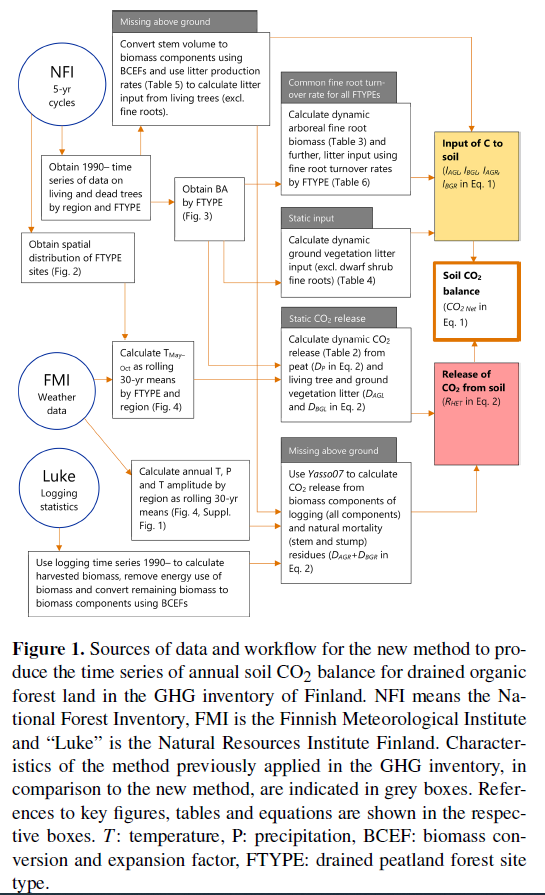

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ftype_codes = {1: 'Rhtkg', 2: 'Mtkg', 4: 'Ptkg', 6: 'Vatkg', 7: 'Jatkg'}

In [3]:
weather_file = r'orgsoil_portable/Input/weather_data.csv'
ba_file = r'orgsoil_portable/Input/basal_areas.csv'
treebm_file = r'orgsoil_portable/Input/biomass.csv'
area_file = r'orgsoil_portable/Input/total_area.csv'
residue_file = r'orgsoil_portable/Input/dead_litter.csv' 
# read data. All have format 'region', 'peat_type', 'year', 'variables

weather = pd.read_csv(weather_file, sep=';')
basal_areas = pd.read_csv(ba_file, sep=';')
tree_biomass = pd.read_csv(treebm_file, sep=';')
ftype_areas = pd.read_csv(area_file, sep=';')
residue_litter = pd.read_csv(residue_file, sep=';')


In [4]:
# compute total basal areas per peattype and inventory region

regs = basal_areas['region'].unique()
ftypes = basal_areas['peat_type'].unique()
yrs = basal_areas['year'].unique()
trees = basal_areas['tree_type'].unique()

rows = len(regs)*len(ftypes)*len(yrs)
cols = ['region', 'peat_type', 'year', 'tree_type', 'basal_area']

tot_basal_areas = pd.DataFrame(columns=cols, data=np.zeros((rows, len(cols))))
k = 0
for r in regs:
    for f in ftypes:
        for yr in yrs:
            mask = (basal_areas['region'] == r) & (basal_areas['peat_type'] == f) & (basal_areas['tree_type'] == f) & (basal_areas['year'] == yr)
            tot_basal_areas['region'][k] = r
            tot_basal_areas['peat_type'][k] = f
            tot_basal_areas['year'][k] = yr
            tot_basal_areas['basal_area'][k] = basal_areas['basal_area'].loc[mask].sum()
            k += 1

    for c in ['peat_type']:
        tot_basal_areas[c] = tot_basal_areas[c].astype(int)


C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4076589365.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_basal_areas['peat_type'][k] = f
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4076589365.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_basal_areas['year'][k] = yr
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4076589365.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_basal_areas['basal_

In [5]:
# aggregate to inventory region
regs = basal_areas['region'].unique()
ftypes = basal_areas['peat_type'].unique()
yrs = basal_areas['year'].unique()

rows = len(regs)*len(ftypes)*len(yrs)
cols = ['region', 'peat_type', 'year', 'basal_area']

all_basal_areas = pd.DataFrame(columns=cols, data=np.zeros((rows, len(cols))))
k = 0
for r in regs:
    for f in ftypes:
        for yr in yrs:
            mask = (basal_areas['region'] == r) & (basal_areas['peat_type'] == f) & (basal_areas['year'] == yr)
            all_basal_areas['region'][k] = r
            all_basal_areas['peat_type'][k] = f
            all_basal_areas['year'][k] = yr
            all_basal_areas['basal_area'][k] = basal_areas['basal_area'].loc[mask].sum()
            k += 1

    for c in ['peat_type']:
        all_basal_areas[c] = tot_basal_areas[c].astype(int)


C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4244235101.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_basal_areas['peat_type'][k] = f
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4244235101.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_basal_areas['year'][k] = yr
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4244235101.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_basal_areas['basal_

### Read litter data

In [6]:
from src.utils import get_datasets

litter, tot_litter = get_datasets(r'c:\repositories\GHGinventory\orgsoil_portable\Input')

c:\Repositories\GHGinventory\src\litter.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['litter'].iloc[k] = afact * cfact * M * ft
c:\Repositories\GHGinventory\src\litter.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ftot['peat_type'][k] = f
c:\Repositories\GHGinventory\src\litter.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ftot['tree_type'][k] = tr
c:\Repositories\GHGinventory\src\litter.py:75: SettingWithCopyWa

### Mean basal areas and site-type areas (Alm et al. Fig. 3)

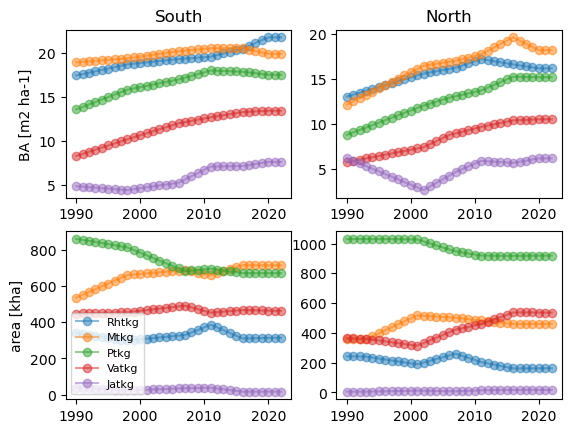

In [7]:

fig, ax = plt.subplots(2,2)

species = 1


for k in tot_litter['peat_type'].unique():
    mask_s = (all_basal_areas['region'] == 'south') & (all_basal_areas['peat_type'] == int(k))
    mask_n = (all_basal_areas['region'] == 'north') & (all_basal_areas['peat_type'] == int(k))
    mask_as = (ftype_areas['region'] == 'south') & (ftype_areas['peat_type'] == int(k))
    mask_an = (ftype_areas['region'] == 'north') & (ftype_areas['peat_type'] == int(k))

    t = all_basal_areas['year'][mask_s]

    ax[0,0].plot(t, all_basal_areas['basal_area'][mask_s], 'o-', alpha=0.5, label=ftype_codes[k])
    ax[0,1].plot(t, all_basal_areas['basal_area'][mask_n], 'o-',alpha=0.5)

    ax[1,0].plot(t, 1e-3*ftype_areas['drained_peatland_area'][mask_as], 'o-', alpha=0.5, label=ftype_codes[k])
    ax[1,1].plot(t, 1e-3*ftype_areas['drained_peatland_area'][mask_an], 'o-', alpha=0.5, label=ftype_codes[k])

ax[0,0].set_title('South'); ax[0,0].set_ylabel('BA [m2 ha-1]')
ax[0,1].set_title('North')
ax[1,0].set_ylabel('area [kha]')
ax[1,0].legend(fontsize=8, loc=3)

fig.savefig(r'results\Fig_annual_ba_peattype_area.png')

### Total tree litter per site type and region

C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2221424847.py:20: RuntimeWarning: divide by zero encountered in divide
  ff = cf* tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2221424847.py:20: RuntimeWarning: invalid value encountered in divide
  ff = cf* tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2221424847.py:48: RuntimeWarning: divide by zero encountered in divide
  ff = cf*tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2221424847.py:48: RuntimeWarning: invalid value encountered in divide
  ff = cf*tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values


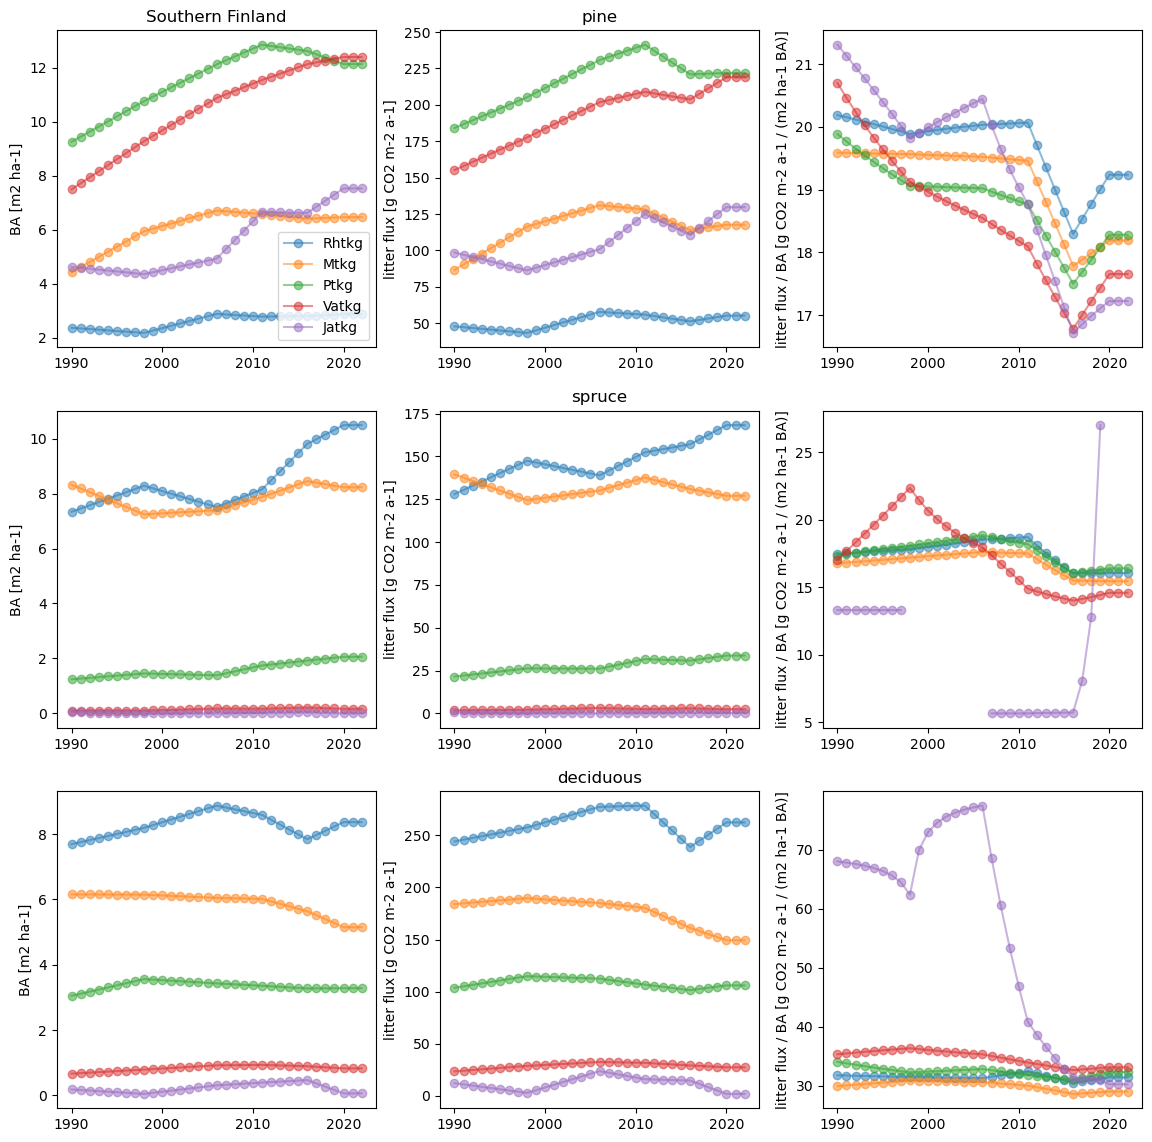

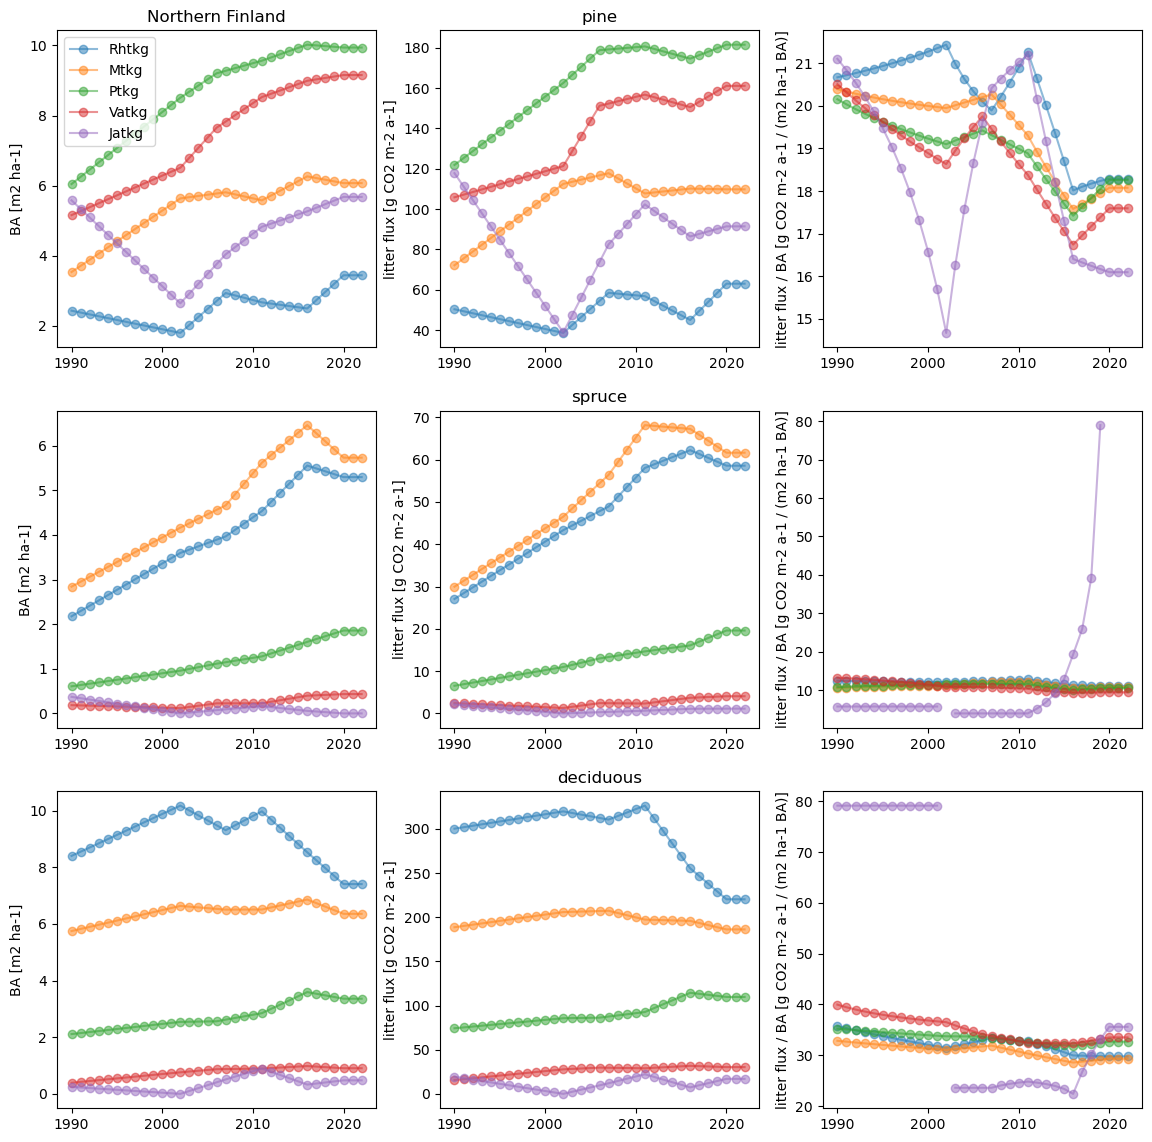

In [8]:
import matplotlib.pyplot as plt
cf = 44./12.

# Southern Finland
fig, ax = plt.subplots(3,3, figsize=(14,14))

j = 0
for species in ['pine', 'spruce', 'deciduous']:
    for k in tot_litter['peat_type'].unique():
        
        mask = (tot_litter['region'] == 'south') & (tot_litter['peat_type'] == k) & (tot_litter['tree_type'] == species)
        mask2 = (basal_areas['region'] == 'south') & (basal_areas['peat_type'] == int(k)) & (basal_areas['tree_type'] == species)

        t = tot_litter['year'][mask]

        ax[j, 1].plot(t, cf *tot_litter['litter'][mask], 'o-', alpha=0.5, label=ftype_codes[k])
        ax[j, 0].plot(t, basal_areas['basal_area'][mask2], 'o-', alpha=0.5, label=ftype_codes[k])

        # litterfall / basal area -ratio [g CO2 m-2 BA]
        ff = cf* tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values
        ax[j,2].plot(t, ff, 'o-', alpha=0.5, label=ftype_codes[k])

    ax[j,1].set_title(species)
    ax[0,0].legend(); ax[j,1].set_ylabel('litter flux [g CO2 m-2 a-1]')
    ax[j,0].set_ylabel('BA [m2 ha-1]')
    ax[j,2].set_ylabel('litter flux / BA [g CO2 m-2 a-1 / (m2 ha-1 BA)]')
    j += 1

ax[0,0].set_title('Southern Finland')
fig.savefig(r'results/Fig_annual_ba_litter_South.png')

# Northern Finland
fig, ax = plt.subplots(3,3, figsize=(14,14))

j = 0
for species in ['pine', 'spruce', 'deciduous']:
    for k in tot_litter['peat_type'].unique():
        
        mask = (tot_litter['region'] == 'north') & (tot_litter['peat_type'] == k) & (tot_litter['tree_type'] == species)
        mask2 = (basal_areas['region'] == 'north') & (basal_areas['peat_type'] == int(k)) & (basal_areas['tree_type'] == species)

        t = tot_litter['year'][mask]

        ax[j, 1].plot(t, cf*tot_litter['litter'][mask], 'o-', alpha=0.5, label=ftype_codes[k])
        ax[j, 0].plot(t, basal_areas['basal_area'][mask2], 'o-', alpha=0.5, label=ftype_codes[k])

        # litterfall / basal area -ratio [kg C m-2 BA]
        ff = cf*tot_litter['litter'][mask].values / basal_areas['basal_area'][mask2].values
        ax[j,2].plot(t, ff, 'o-', alpha=0.5, label=ftype_codes[k])

    ax[j,1].set_title(species)
    ax[0,0].legend(); ax[j,1].set_ylabel('litter flux [g CO2 m-2 a-1]')
    ax[j,0].set_ylabel('BA [m2 ha-1]')
    ax[j,2].set_ylabel('litter flux / BA [g CO2 m-2 a-1 / (m2 ha-1 BA)]')
    j += 1

ax[0,0].set_title('Northern Finland')

fig.savefig(r'results/Fig_annual_ba_litter_North.png')

### Summing tree-species litter inputs to site-type level

In [9]:
# compute site-type sums of litter inputs to variable 'litter_sum'

yrs = tot_litter['year'].unique()
sites = tot_litter['peat_type'].unique()
rows = (len(yrs)*len(sites)*2)
cols = ['region', 'peat_type', 'year', 'litter']

litter_sum = pd.DataFrame(columns=['region', 'peat_type', 'year', 'litter'], data=np.zeros((rows, len(cols))))
k = 0
for r in ['south', 'north']:
    for s in sites:
        for y in yrs:
            mask = (tot_litter['region'] == r) & (tot_litter['peat_type'] == s) & (tot_litter['year'] == y)
            litter_sum['region'][k] = r
            litter_sum['peat_type'][k] = s
            litter_sum['year'][k] = y
            litter_sum['litter'][k] = tot_litter['litter'].loc[mask].sum()
            k +=1
litter_sum['peat_type'] = litter_sum['peat_type'].astype(int)

C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\1069127863.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_sum['peat_type'][k] = s
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\1069127863.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_sum['year'][k] = y
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\1069127863.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_sum['litter'][k] = tot_litt

south Rhtkg 24.108653180317585 24.115268181742007 22.367340954810235
south Mtkg 21.922286442689686 21.852351317545164 19.852068710252855
south Ptkg 21.792239841598423 22.583253111522023 20.686617026513048
south Vatkg 19.820674032962472 21.4365752253745 18.56419976026814
south Jatkg 20.967198967231347 22.324914177645677 17.357241743433832
north Rhtkg 25.78426457229928 28.405943884198653 21.176709452671147
north Mtkg 22.255888013285272 23.603249072153744 19.69481874748689
north Ptkg 21.585418210690214 22.79842303143616 20.50847333154661
north Vatkg 20.43244985324417 21.347116397732794 18.629026531870846
north Jatkg 18.889602886034673 21.87296500691566 17.789386090006307


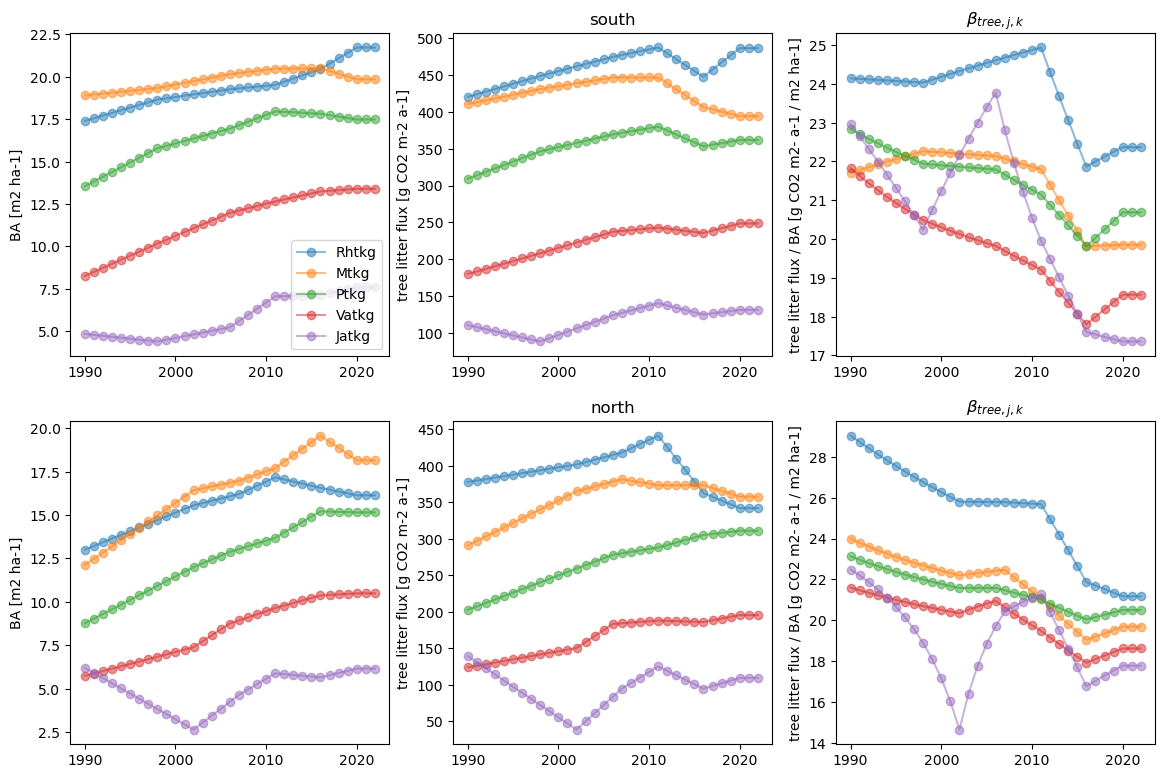

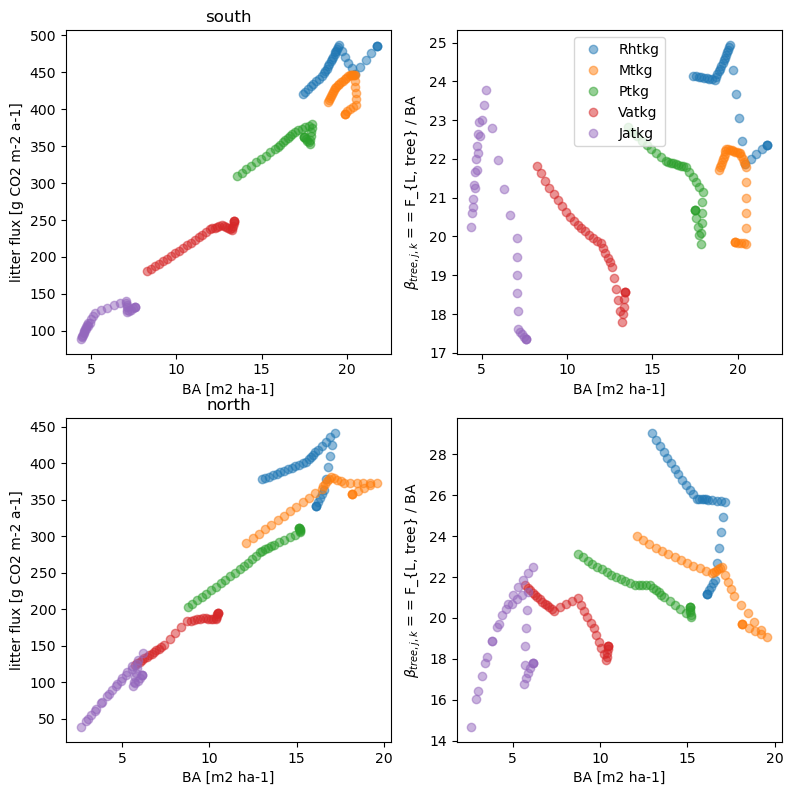

In [10]:
# plot figure of site-type total tree litter flux
fig, ax = plt.subplots(2,3, figsize=(14,14*0.66))
fig2, ax2 = plt.subplots(2,2, figsize=(14*0.66, 14*0.66))

cf = 44.0/12.0

j = 0
m = 0
for r in ['south', 'north']:
    for k in tot_litter['peat_type'].unique():
        
        mask = (litter_sum['region'] == r) & (litter_sum['peat_type'] == k)
        mask2 = (all_basal_areas['region'] == r) & (all_basal_areas['peat_type'] == k)

        t = litter_sum['year'][mask]
        ax[j, 1].plot(t, cf*litter_sum['litter'][mask], 'o-', alpha=0.5, label=ftype_codes[k])
        ax[j, 0].plot(t, all_basal_areas['basal_area'][mask2], 'o-', alpha=0.5, label=ftype_codes[k])

        # litterfall / basal area -ratio [kg C m-2 BA]
        ff = cf*litter_sum['litter'][mask].values / all_basal_areas['basal_area'][mask2].values

        beta = np.median(ff) # g CO2 m-2 a-1
        print(r, ftype_codes[k], beta, np.median(ff[0:5]), np.median(ff[-5:]))
        ax[j,2].plot(t, ff, 'o-', alpha=0.5, label=ftype_codes[k])

        ax2[m,0].plot(all_basal_areas['basal_area'][mask], cf*litter_sum['litter'][mask], 'o', alpha=0.5, label=ftype_codes[k])
        ax2[m,1].plot(all_basal_areas['basal_area'][mask], ff, 'o', alpha=0.5, label=ftype_codes[k])
        
    ax[j,1].set_title(r)
    ax[0,0].legend(); ax[j,1].set_ylabel('tree litter flux [g CO2 m-2 a-1]')
    ax[j,0].set_ylabel('BA [m2 ha-1]')
    ax[j,2].set_title(r'$\beta_{tree,j,k}$')
    ax[j,2].set_ylabel('tree litter flux / BA [g CO2 m2- a-1 / m2 ha-1]')
    
    ax2[m,0].set_title(r)
    ax2[m,0].set_ylabel('litter flux [g CO2 m-2 a-1]')
    ax2[m,0].set_xlabel('BA [m2 ha-1]')
    ax2[m,1].set_ylabel(r'$\beta_{tree,j,k}$ = = F_{L, tree} / BA')
    ax2[m,1].set_xlabel('BA [m2 ha-1]')
    ax2[0,1].legend()

    j += 1
    m += 1

fig.savefig(r'results/Fig_annual_ba_tree_litter_per_sitetype.png')
fig2.savefig(r'results/Fig_tree_litter_vs_ba.png')

### Compute fine root and ground vegetation litter fluxes

Alm et al. (2023) Table 3, 4 & 6

In [11]:
from src.litter import estimate_root_gw_litter

# estimate ground vegetation and fine root litter fluxes
yrs = basal_areas['year'].unique()
sites = basal_areas['peat_type'].unique()
region = ['south', 'north']
rows = len(yrs)*len(sites)*len(region)
cols = ['region', 'peat_type', 'year', 'BApine', 'BAspruce', 'BAdeciduous', 'BA']

ba_for_litter = pd.DataFrame(columns=cols, data=np.zeros((rows, len(cols))))
k = 0
for r in region:
    for s in sites:
        for yr in yrs:
            mask = (basal_areas['region'] == r) & (basal_areas['peat_type'] == s) & (basal_areas['year'] == yr)
            ba_for_litter['region'][k] = r
            ba_for_litter['peat_type'][k] = s
            ba_for_litter['year'][k] = yr

            xx = basal_areas[mask]
            #mask2 = xx['tree_type'] == 'pine'
            ba_for_litter['BApine'][k] =xx['basal_area'][(xx['tree_type'] == 'pine')].values
            ba_for_litter['BAspruce'][k] =xx['basal_area'][(xx['tree_type'] == 'spruce')].values
            ba_for_litter['BAdeciduous'][k] =xx['basal_area'][(xx['tree_type'] == 'deciduous')].values
            ba_for_litter['BA'][k] = xx['basal_area'].sum()

            k += 1
for c in ['peat_type', 'year']:
    ba_for_litter[c] = ba_for_litter[c].astype(int)

# in [g C m-2 a-1]
root_gw_litter = estimate_root_gw_litter(ba_for_litter) 

C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\3867242069.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_for_litter['peat_type'][k] = s
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\3867242069.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_for_litter['year'][k] = yr
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\3867242069.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_for_litter['BApine'][k] 

In [12]:
# append tree litter to same dataframe

litter_flux = root_gw_litter.copy()
litter_flux['tree_litter'] = np.zeros(len(litter_flux))
litter_flux['total_litter'] = np.zeros(len(litter_flux))

for k in range(len(litter_flux)):
    mask = (litter_sum['region'] == litter_flux['region'][k]) & (litter_sum['peat_type'] == litter_flux['peat_type'][k]) \
            & (litter_sum['year'] == litter_flux['year'][k])
    litter_flux['tree_litter'][k] = litter_sum['litter'][mask]
    litter_flux['total_litter'][k] = litter_flux['gw_litter'][k] + litter_flux['root_litter'][k] + litter_flux['tree_litter'][k]

C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\1608154583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_flux['tree_litter'][k] = litter_sum['litter'][mask]
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\1608154583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_flux['total_litter'][k] = litter_flux['gw_litter'][k] + litter_flux['root_litter'][k] + litter_flux['tree_litter'][k]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


south Rhtkg 48.840327079486286 50.489899765262436 43.188467568976264
south Mtkg 52.91271102165241 54.47100275352843 50.66702940309398
south Ptkg 75.22448298893202 85.99233316998819 72.36853641651697
south Vatkg 70.90659339535371 93.27790202109534 63.67528068532664
south Jatkg 106.31810257320448 114.09044683744453 72.58522415310512
north Rhtkg 50.016394779823834 57.95315923937717 44.59844812833242
north Mtkg 50.37824333570863 60.25117904055459 45.44609351524233
north Ptkg 72.99820168025074 92.5170450236257 65.08444205229557
north Vatkg 85.47491661464929 117.36666354542109 71.58278068115726
north Jatkg 90.71300567074239 87.15160661800053 76.95902818819289


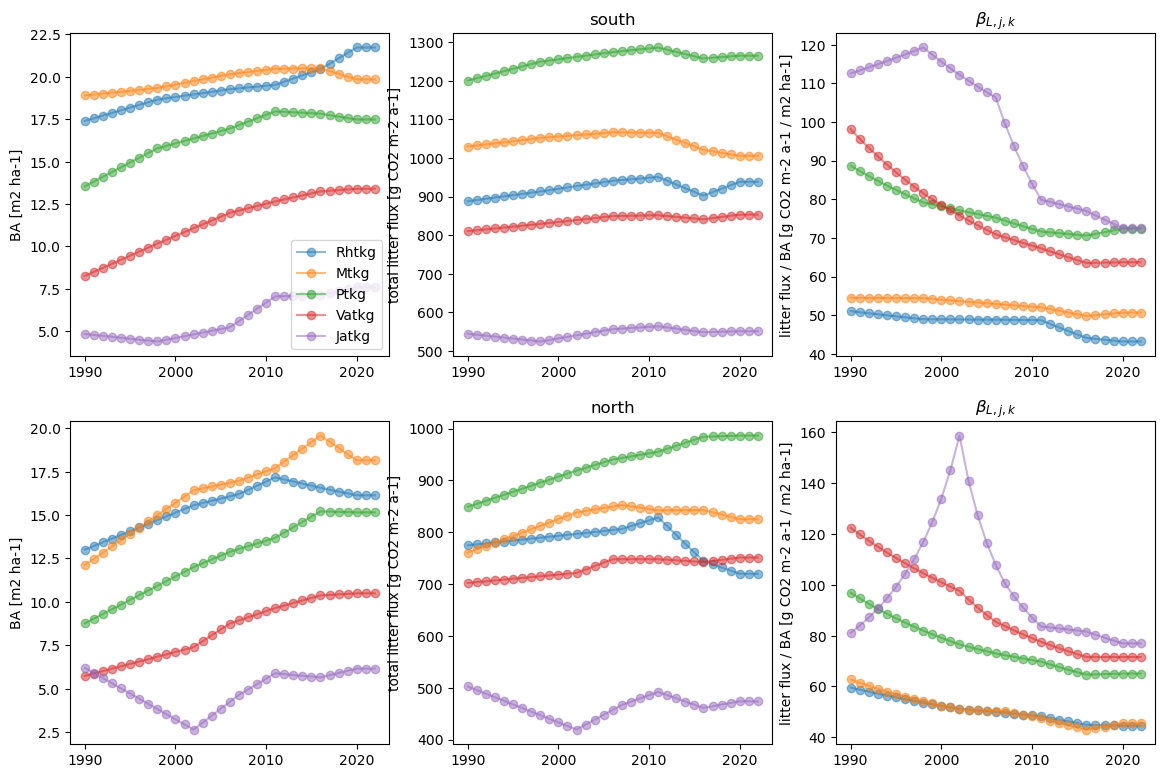

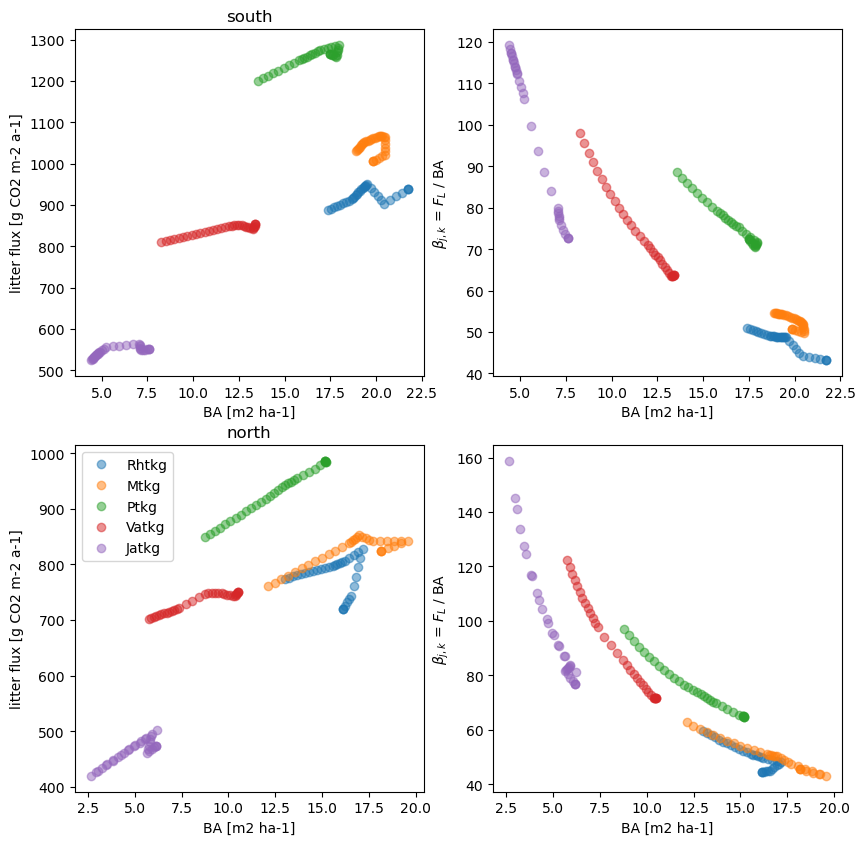

In [13]:
# plot figure
fig, ax = plt.subplots(2,3, figsize=(14,14*0.66))
fig2, ax2 = plt.subplots(2,2, figsize=(15*0.66, 15*0.66))
cf = 44.0/12.0

j = 0
m = 0
for r in ['south', 'north']:
    for k in litter_flux['peat_type'].unique():
        
        mask = (litter_flux['region'] == r) & (litter_flux['peat_type'] == k)

        t = litter_flux['year'][mask]
        ax[j, 1].plot(t, cf*litter_flux['total_litter'][mask], 'o-', alpha=0.5, label=ftype_codes[k])
        ax[j, 0].plot(t, litter_flux['BA'][mask], 'o-', alpha=0.5, label=ftype_codes[k])

        # litterfall / basal area -ratio [g C m-2 BA]
        ff = cf*litter_flux['total_litter'][mask].values / litter_flux['BA'][mask].values

        beta = np.median(ff) # g CO2 m-2 a-1 /(m2 ha-1)
        print(r, ftype_codes[k], beta, np.median(ff[0:5]), np.median(ff[-5:]))
        ax[j,2].plot(t, ff, 'o-', alpha=0.5, label=ftype_codes[k])

        ax2[m,0].plot(litter_flux['BA'][mask], cf*litter_flux['total_litter'][mask], 'o', alpha=0.5, label=ftype_codes[k])
        ax2[m,1].plot(litter_flux['BA'][mask], ff, 'o', alpha=0.5, label=ftype_codes[k])

    ax[j,1].set_title(r)
    ax[0,0].legend(); ax[j,1].set_ylabel('total litter flux [g CO2 m-2 a-1]')
    ax[j,0].set_ylabel('BA [m2 ha-1]')
    ax[j,2].set_title(r'$\beta_{L,j,k}$')
    ax[j,2].set_ylabel('litter flux / BA [g CO2 m-2 a-1 / m2 ha-1]')
    
    ax2[m,0].set_title(r)
    ax2[m,0].set_ylabel('litter flux [g CO2 m-2 a-1]')
    ax2[m,0].set_xlabel('BA [m2 ha-1]')
    ax2[m,1].set_ylabel(r'$\beta_{j,k}$ = $F_{L}$ / BA')
    ax2[m,1].set_xlabel('BA [m2 ha-1]')

    ax2[1,0].legend()
    j += 1
    m +=1


fig.savefig(r'results/Fig_annual_ba_litter_per_sitetype.png')
fig2.savefig(r'results/Fig_litter_vs_ba.png')

In [14]:
44./12 *312


1144.0

### Check total annual litter inputs for regions

In [15]:
litter_regional = pd.DataFrame(columns=['region', 'peat_type', 'year', 'litter', 'litter_ha'], data=np.zeros((2*5*len(yrs), 5)))

k = 0
for r in ['south', 'north']:
    for s in sites:
        for y in yrs:
            mask = (litter_sum['region']==r) & (litter_sum['peat_type']==s) & (litter_sum['year']==y)
            mask2 = (ftype_areas['region'] == r) & (ftype_areas['peat_type'] ==s) & (ftype_areas['year'] == y)

            litter_regional['region'][k] = r
            litter_regional['peat_type'][k] = s
            litter_regional['year'][k] = y
            litter_regional['litter'][k] = litter_sum['litter'][mask].values * ftype_areas['drained_peatland_area'][mask2].values
            litter_regional['litter_ha'][k] = litter_sum['litter'][mask]
            k += 1

litter_regional['peat_type'] = litter_regional['peat_type'].astype(int)

    

C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2839763077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_regional['peat_type'][k] = s
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2839763077.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_regional['year'][k] = y
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\2839763077.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litter_regional['litter'

### Soil CO2 balance per unit area for each site type

Soil $F_{net}$ without cutting residues is computed as:

$$
\begin{aligned}
\begin{equation}
    F_{Net} = - F_{L} + R_{het}, \qquad
\end{equation}
\end{aligned}
$$
where $F_L$ [g CO$_2$ m-2 a-1] is the litter influx, R$_{het}$ implicit peat and 'living litter' decomposition [g CO$_2$ m-2 a-1] and negative balance means net soil CO$_2$ sink.

Assuming $F_L$ is proportional to BA, this becomes
$$
\begin{aligned}
\begin{equation}
    F_{Net, j} = -\beta_j \,BA + (\alpha_{0,j} + \alpha_1 \, BA + \alpha_2 \, T_{gs}),  \qquad
\end{equation}
\end{aligned}
$$
where $\beta_j$ is the peatland-type and region depended litter production to BA -ratio, $\alpha_{0,j}$ [g CO2 m-2 a-1] site-type specific intercept (when BA=0 and T=0!), and $\alpha_1$ [g CO2 m-2 a-1 ha m-2] and $\alpha_2$ [g CO2 m-2 a-1 degC-1] sensitivities of $R_{het}$ to BA and May-Oct air temperature $T_{gs}$.

Re-organizing yields
$$
\begin{aligned}
\begin{equation}
    F_{Net, j} = \alpha_{0,j} + (\alpha_1 - \beta_j) \, BA + \alpha_2 \, T_{gs},  \qquad
\end{equation}
\end{aligned}
$$

where the net effect of BA on $F_{net}$ now depends on ($\alpha_1 - \beta_j$). $\alpha_1$ = 14.74 based on Ojanen et al. 2014. Based on Fig. x, the median values for $\beta_j$ for 1990-2020 period range from 19.0 (at Jatkg in North) to 25.0 (at Rhtkg in South). 




In [16]:
ix = (all_basal_areas['year'] == 2022)
ba_current = all_basal_areas[ix]

ba_current

,region,peat_type,year,basal_area
32,south,1,2022.0,21.723374
65,south,2,2022.0,19.846049
98,south,4,2022.0,17.480467
131,south,6,2022.0,13.396766
164,south,7,2022.0,7.589610
197,north,1,2022.0,16.140112
230,north,2,2022.0,18.156357
263,north,4,2022.0,15.155658
296,north,6,2022.0,10.491729
329,north,7,2022.0,6.155442


In [17]:
ix = (weather['peat_type'] == 1) & (weather['region'] == 'south')
#ix = weather['year'] >= 2020
T = weather[ix]
print(T)

    region  peat_type  year     roll_T
165  south          1  1990  10.954172
166  south          1  1991  10.921141
167  south          1  1992  10.947886
168  south          1  1993  10.867785
169  south          1  1994  10.864595
170  south          1  1995  10.906176
171  south          1  1996  10.900249
172  south          1  1997  10.891926
173  south          1  1998  10.918283
174  south          1  1999  10.944522
175  south          1  2000  10.955130
176  south          1  2001  11.005841
177  south          1  2002  10.994542
178  south          1  2003  11.019293
179  south          1  2004  11.029471
180  south          1  2005  11.051296
181  south          1  2006  11.164507
182  south          1  2007  11.222937
183  south          1  2008  11.243918
184  south          1  2009  11.252206
185  south          1  2010  11.295302
186  south          1  2011  11.355939
187  south          1  2012  11.391083
188  south          1  2013  11.430043
189  south          1  20

In [18]:
def soil_nee_linear(region: str, ftype: int, BA: float, T: float):
    """
    Annual peatland soil NEE (old peat + implicit plant litter)

    Args:
        ftype - site fertility type code: 1  Herb-rich type; 2  Vaccinium myrtillus type; 4  Vaccinium vitis-idaea type;
                6  Dwarf shrub type; 7  Cladina type
        BA - mean stand basal area [m2 ha-1]
        T - mean (30-year running average) May-Oct air temperature
    Returns:
        NEEs - soil NEE [g CO2 m-2 a-1]
    """

    a0 = {1: -1383.0, 2: -1440.0, 4: -1662.0, 6: -1771.0, 7: -1814.0} # intercept for each ftype [g CO2 m-2 a-1]
    a1 = 14.74 # g CO2 m-2 a-1 ha m-2
    a2 = 242.8 # g CO2 m-2 a-1 degC-1

    # median litter production / BA ratios for 5 last years
    b = {'south': {1: 43.19, 2: 50.67, 4: 72.37, 6: 63.68, 7: 72.59},
         'north': {1: 44.60, 2: 45.45, 4: 65.08 , 6: 71.58, 7: 76.96}}
    
    NEEs = a0[ftype] + (a1 - b[region][ftype]) * BA + a2 * T

    dBA = a0[ftype] + (a1 - b[region][ftype]) *(BA + 1) + a2 * T - NEEs
    dT = a0[ftype] + (a1 - b[region][ftype]) * BA + a2 * (T + 1) - NEEs

    Rhet = a0[ftype] + a1*BA + a2*T
    dRhBA = a0[ftype] + a1*(BA+1) + a2*T - Rhet
    dRhT = a0[ftype] + a1*BA + a2*(T+1) - Rhet

    # Q10
    R1 = a0[ftype] + a1*BA + a2 * (T)
    R2 = a0[ftype] + a1 * BA + a2 * (T+1.0)
    Q10 = (R2/R1)**(10.0/1)


    return NEEs, dBA, dT, dBA/NEEs, dT/NEEs, Rhet, Q10, dRhBA/Rhet, dRhT/Rhet

In [19]:
#from src.peatcarbon import soil_nee_linear, soil_respiration_flux

BA = {'south': {1: 21.7, 2: 19.8, 4: 17.5, 6: 13.4, 7: 7.6},
       'north': {1: 16.1, 2: 18.2, 4: 15.2, 6: 10.5, 7: 6.2}
    }
Tgs = {'south': {1: 11.7, 2: 11.6, 4: 11.3, 6: 11.3, 7: 11.2},
       'north': {1: 10.0, 2: 10.1, 4: 9.9, 6: 9.9, 7: 10.4}
       }


res = pd.DataFrame(columns=['region', 'peat_type', 'Tgs', 'BA', 'Rhet', 'Q10', 'dRBAr', 'dRTr', 'NEEs', 'dBA', 'dT', 'dBAr', 'dTr'], data=np.zeros((10,13)))

k = 0
for r in ['south', 'north']:
    for s in [1,2,4,6,7]:
        NEEs, dBA, dT, dBAr, dTr, Rhet, Q10, dRBAr, dRTr = soil_nee_linear(region=r, ftype=s, BA=BA[r][s], T=Tgs[r][s])
        res['region'][k] = r
        res['peat_type'][k] = ftype_codes[s]
        res['Tgs'][k] = Tgs[r][s]
        res['BA'][k] = BA[r][s]
        res['NEEs'][k] = NEEs
        res['dBA'][k] = dBA
        res['dT'][k] = dT
        res['dBAr'][k] = 100*dBAr
        res['dTr'][k] = 100*dTr
        res['Rhet'][k] = Rhet
        res['Q10'][k] = Q10
        res['dRBAr'][k] = 100*dRBAr
        res['dRTr'][k] = 100*dRTr  
        k += 1



C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4136459348.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['peat_type'][k] = ftype_codes[s]
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4136459348.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Tgs'][k] = Tgs[r][s]
C:\Users\03081268\AppData\Local\Temp\ipykernel_8144\4136459348.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['BA'][k] = BA[r][s]
C:\U

In [20]:
res
#res.to_excel(r'results\Rhet_sensitivities.xlsx')

,region,peat_type,Tgs,BA,Rhet,Q10,dRBAr,dRTr,NEEs,dBA,dT,dBAr,dTr
0,south,Rhtkg,11.7,21.7,1777.618,3.597724,0.829200,13.658728,840.395,-28.45,242.8,-3.385313,28.891176
1,south,Mtkg,11.6,19.8,1668.332,3.891186,0.883517,14.553458,665.066,-35.93,242.8,-5.402471,36.507655
2,south,Ptkg,11.3,17.5,1339.590,5.289521,1.100337,18.124949,73.115,-57.63,242.8,-78.821035,332.079601
3,south,Vatkg,11.3,13.4,1170.156,6.589444,1.259661,20.749370,316.844,-48.94,242.8,-15.446087,76.630771
4,south,Jatkg,11.2,7.6,1017.384,8.501403,1.448814,23.865129,465.700,-57.85,242.8,-12.422160,52.136569
5,north,Rhtkg,10.0,16.1,1282.314,5.663426,1.149484,18.934520,564.254,-29.86,242.8,-5.291943,43.030267
6,north,Mtkg,10.1,18.2,1280.548,5.675873,1.151070,18.960632,453.358,-30.71,242.8,-6.773896,53.555909
7,north,Ptkg,9.9,15.2,965.768,9.418523,1.526246,25.140613,-23.448,-50.34,242.8,214.687820,-1035.482770
8,north,Vatkg,9.9,10.5,787.490,14.694147,1.871770,30.832138,35.900,-56.84,242.8,-158.328691,676.323120
9,north,Jatkg,10.4,6.2,802.508,14.058825,1.836742,30.255150,325.356,-62.22,242.8,-19.123668,74.625948


In [21]:
def soil_respiration_flux(ftype: int, BA: float, T:float):
    """
    Annual heterotropthic respiration from peatland soil (old peat + implicit plant litter)
    Based on Ojanen et al. 2014. For. Ecol. Manag.; exact form as Alm et al. 2023 Biogeosci. Table 2

    Args:
        ftype - site fertility type code: 1  Herb-rich type; 2  Vaccinium myrtillus type; 4  Vaccinium vitis-idaea type;
                6  Dwarf shrub type; 7  Cladina type
        BA - mean stand basal area [m2 ha-1]
        T - mean (30-year running average) May-Oct air temperature
    Returns:
        Rhet - heterorophic respiration, CO2 emission from soil [g CO2 m-2 a-1]
    """

    a0 = {1: -1383.0, 2: -1440.0, 4: -1662.0, 6: -1771.0, 7: -1814.0} # intercept for each ftype [g CO2 m-2 a-1]
    a1 = 14.74 # g CO2 m-2 a-1 ha m-2
    a2 = 242.8 # g CO2 m-2 a-1 degC-1

    Rhet = a0[ftype] + a1*BA + a2*T

    # Q10
    R1 = a0[ftype] + a1*BA + a2 * (T-0.5)
    R2 = a0[ftype] + a1 * BA + a2 * (T+0.5)
    Q10 = (R2/R1)**(10.0/1)

    #print(Q10)
    return Rhet, Q10

In [22]:
#from src.peatcarbon import soil_respiration_flux
Rhet1, Q10 = soil_respiration_flux(ftype=1, BA=21.7, T=9.0)

Rhet0, Q100 = soil_respiration_flux(ftype=1, BA=17.39, T=11.5)

print(Rhet0, Rhet1, Q10, Q100, Rhet1/Rhet0)


1665.5286000000003 1122.0580000000002 8.779190844391776 4.30761944497999 0.6736948257748321


In [ ]:
import numpy as np

def yasso_envmod(T:float, P:float):
    # T - annual mean temperature (degC)
    # P - annual precipitation (m)    
    b1 = 0.0885 #C-1
    b2 = -0.0023 #C-2
    gamma = 2.94 #m-1

    fT = np.exp(b1*T + b2*T**2)
    fP = (1.0 - np.exp(gamma * P))

    return fT, fP


2.1106585335435515


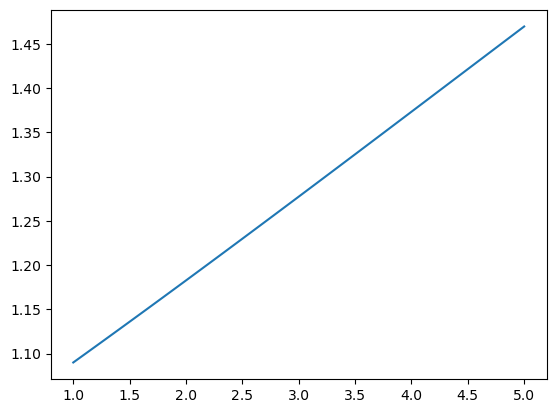

In [ ]:
T = np.linspace(1, 5, 100)
P = 7.0

fT, fP = yasso_envmod(T, P)

plt.plot(T, fT)

Q10 = (fT[-1]/fT[0])**(10/(T[-1]-T[0]))
print(Q10)

### Given current Litter input / BA ratio and T=10degC, what is soil NEE as function of BA? Compare with Ojanen et al. 2014 'data' (Fig. 9)

In [45]:
# Given current Litter input / BA ratio and T=10degC, what is soil NEE as function of BA?

BA = np.linspace(1,50,40)
Ta = 10.0

stype = list(ftype_codes.keys())

sNEE = []
sRhet = []
nNEE = []
nRhet = []


for s in stype:
    NEEs, _, _, _, _, Rhet, Q10, _, _ = soil_nee_linear(region='south', ftype=s, BA=BA, T=Ta)
    sNEE.append(NEEs)
    sRhet.append(Rhet)

    NEEs, _, _, _, _, Rhet, Q10, _, _ = soil_nee_linear(region='north', ftype=s, BA=BA, T=Ta)
    nNEE.append(NEEs)
    nRhet.append(Rhet)

In [30]:
sNEE

[array([1016.55      ,  993.00517241,  969.46034483,  945.91551724,
         922.37068966,  898.82586207,  875.28103448,  851.7362069 ,
         828.19137931,  804.64655172,  781.10172414,  757.55689655,
         734.01206897,  710.46724138,  686.92241379,  663.37758621,
         639.83275862,  616.28793103,  592.74310345,  569.19827586,
         545.65344828,  522.10862069,  498.5637931 ,  475.01896552,
         451.47413793,  427.92931034,  404.38448276,  380.83965517,
         357.29482759,  333.75      ]),
 array([952.07      , 922.33482759, 892.59965517, 862.86448276,
        833.12931034, 803.39413793, 773.65896552, 743.9237931 ,
        714.18862069, 684.45344828, 654.71827586, 624.98310345,
        595.24793103, 565.51275862, 535.77758621, 506.04241379,
        476.30724138, 446.57206897, 416.83689655, 387.10172414,
        357.36655172, 327.63137931, 297.8962069 , 268.16103448,
        238.42586207, 208.69068966, 178.95551724, 149.22034483,
        119.48517241,  89.75      ])

(-1200.0, 1200.0)

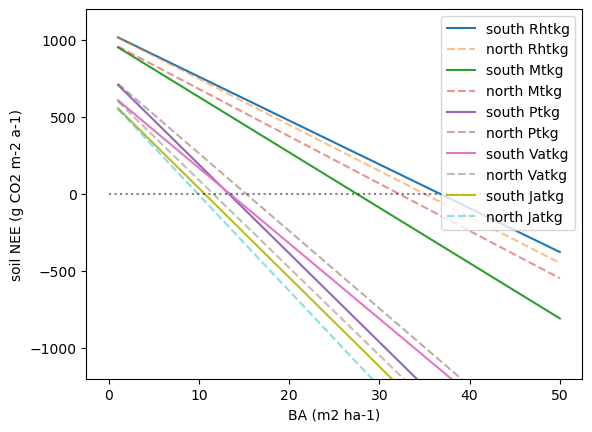

In [46]:
for k in range(len(stype)):
    plt.plot(BA, sNEE[k], '-', label='south ' + ftype_codes[stype[k]])
    plt.plot(BA, nNEE[k], '--', alpha=0.5, label='north ' + ftype_codes[stype[k]])
plt.plot([0,50], [0,0], ':', color='k', alpha=0.5)
plt.legend()
plt.ylabel('soil NEE (g CO2 m-2 a-1)')
plt.xlabel('BA (m2 ha-1)')
plt.ylim(-1200, 1200)
